<a href="https://colab.research.google.com/github/vibh1608/TensorFlow-Tutorials/blob/master/Simple%20Linear%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
work_dir = "/content/TensorFlow-Tutorials/"
if os.getcwd() != work_dir:
    !git clone https://github.com/Hvass-Labs/TensorFlow-Tutorials.git
os.chdir(work_dir)

Cloning into 'TensorFlow-Tutorials'...
remote: Enumerating objects: 471, done.
remote: Total 471 (delta 0), reused 0 (delta 0), pack-reused 471
Receiving objects: 100% (471/471), 61.91 MiB | 30.33 MiB/s, done.
Resolving deltas: 100% (221/221), done.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [9]:
tf.__version__

'1.13.1'

In [10]:
from mnist import MNIST
data = MNIST(data_dir="data/MNIST/")

- Download progress: 100.0% Done!
- Download progress: 100.0% Done!
- Download progress: 100.0% Done!
- Download progress: 100.0% Done!


In [12]:
print("Size of:")
print("Training set:\t\t {}".format(data.num_train))
print("Validation set:\t\t {}".format(data.num_val))
print("Test set:\t\t {}".format(data.num_test))

Size of:
Training set:		 55000
Validation set:		 5000
Test set:		 10000


In [0]:
image_size_flat = data.img_size_flat

image_shape = data.img_shape

num_classes = data.num_classes

In [14]:
data.y_test[0:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [15]:
data.y_test_cls[0:5]

array([7, 2, 1, 0, 4])

In [0]:
def plot_images(images,cls_true,cls_pred=None):
  assert len(images) == len(cls_true) == 9
  
  fig, axes = plt.subplots(3, 3)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)
  for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(image_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
  plt.show()

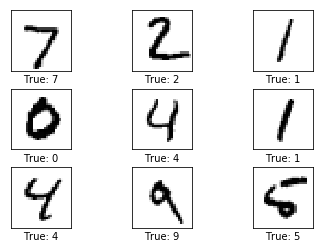

In [20]:
# Get the first images from the test-set.
images = data.x_test[0:9]

# Get the true classes for those images.
cls_true = data.y_test_cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [0]:
x = tf.placeholder(tf.float32,[None,image_size_flat])

y_true = tf.placeholder(tf.float32,[None,num_classes])

y_true_cls = tf.placeholder(tf.int64,[None])

In [22]:
weights = tf.Variable(tf.zeros([image_size_flat,num_classes]))

biases = tf.Variable(tf.zeros([num_classes]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
logits = tf.matmul(x,weights) + biases

y_pred = tf.nn.softmax(logits)

y_pred_cls = tf.argmax(y_pred,axis=1)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)

cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
session = tf.Session()

session.run(tf.global_variables_initializer())


In [0]:
batch_size = 100

In [0]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch, _ = data.random_batch(batch_size=batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

In [0]:
feed_dict_test = {x: data.x_test,y_true: data.y_test,y_true_cls: data.y_test_cls}

In [0]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.y_test_cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.x_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(image_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [34]:
print_accuracy()

Accuracy on test-set: 9.8%


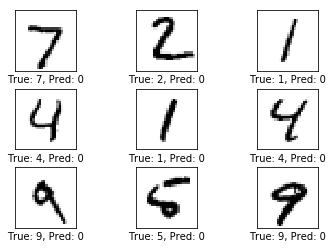

In [35]:
plot_example_errors()

In [0]:
optimize(num_iterations=1)

In [37]:
print_accuracy()

Accuracy on test-set: 38.7%


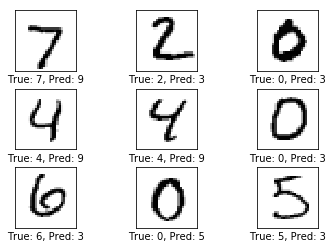

In [38]:
plot_example_errors()

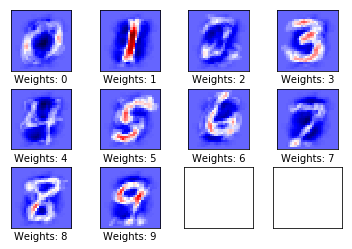

In [41]:
plot_weights()

In [0]:
optimize(num_iterations=1000)

In [43]:
print_accuracy()

Accuracy on test-set: 91.8%


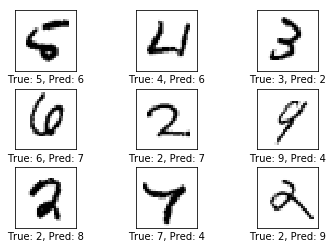

In [44]:
plot_example_errors()

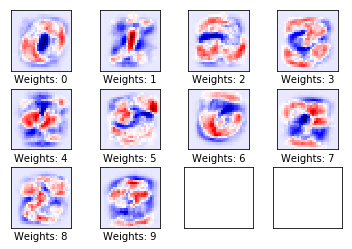

In [45]:
plot_weights()

[[ 945    0    3    1    0   10   13    1    7    0]
 [   0 1103    2    2    0    3    4    1   20    0]
 [   4    8  898   13   12    5   12   13   59    8]
 [   3    1   22  892    0   36    2   11   36    7]
 [   1    2    5    2  903    1   16    4   13   35]
 [   7    3    2   21    6  789   15    4   39    6]
 [   8    3    6    1   12   12  909    3    4    0]
 [   1    9   20    7    6    1    0  938    4   42]
 [   4    5    3   13    6   23    9    5  904    2]
 [   7    6    2    6   29   11    0   23   24  901]]


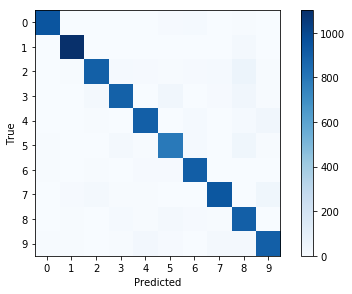

In [46]:
print_confusion_matrix()